In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
DFtrain = pd.read_csv('Data/1A_TrainingData.csv')
DFvalid = pd.read_csv('Data/1A_ValidationData.csv')
DFtrain
print(DFtrain.head())
DFvalid.head()

   BPOS  APP_AMPS  CLMBS  FRNT  ROOF  RH_WNG  LH_WNG  REAR
0     1         0      0   0.0   0.0     0.0     0.0   0.0
1     2         0      0   0.0   0.0     0.0     0.0   0.0
2     3         0      0   0.0   0.0     0.0     0.0   0.0
3     4         0      0   0.0   0.0     0.0     0.0   0.0
4     5         0      0   0.0   0.0     0.0     0.0   0.0


,BPOS,APP_AMPS,CLMBS,FRNT,ROOF,RH_WNG,LH_WNG,REAR
0,1,0,0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0.0,0.0,0.0,0.0,0.0
2,3,0,0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0.0,0.0,0.0,0.0,0.0
4,5,0,0,0.0,0.0,0.0,0.0,0.0


In [3]:
FRNT_CLMBS=DFtrain['FRNT'].cumsum()
DFtrain['FRNT_CLMBS']=DFtrain['FRNT'].cumsum()
DFtrain.head()


,BPOS,APP_AMPS,CLMBS,FRNT,ROOF,RH_WNG,LH_WNG,REAR,FRNT_CLMBS
0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0


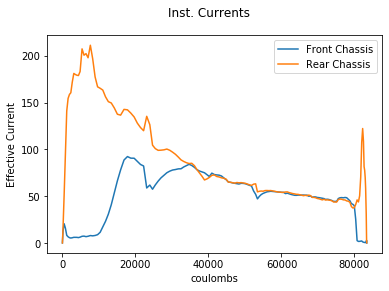

In [4]:
fig = plt.figure()
fig.suptitle('Inst. Currents')
plt.plot(DFtrain['CLMBS'],DFtrain['FRNT'],label='Front Chassis')
plt.plot(DFtrain['CLMBS'],DFtrain['REAR'],label='Rear Chassis')
#plt.plot(DFtrain['CLMBS'],FRNT_CLMBS,label='Front Chassis Coulombs')

plt.xlabel('coulombs')
plt.ylabel('Effective Current')
plt.legend()

In [5]:
import seaborn as sns

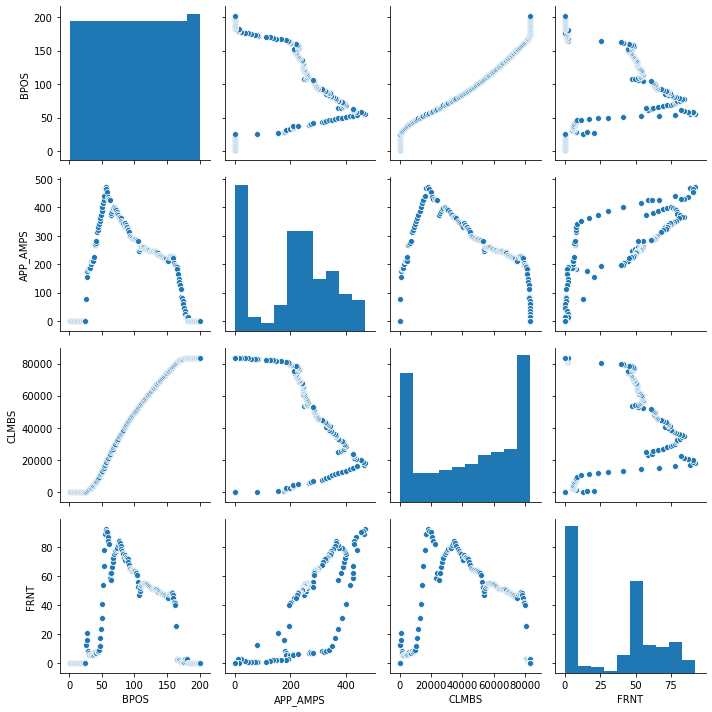

In [73]:
cols = ['BPOS','APP_AMPS','CLMBS','FRNT']#,'ROOF','RH_WNG','LH_WNG','REAR']
sns.pairplot(DFtrain[cols],height=2.5)
plt.tight_layout()
plt.show()

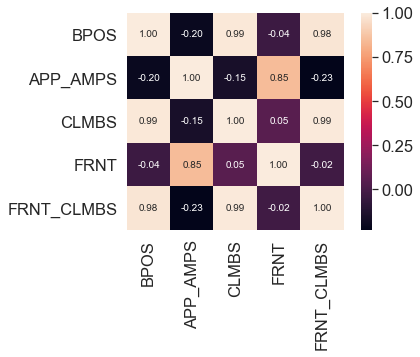

In [109]:
cm = np.corrcoef(DFtrain[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':10},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

In [6]:
DFtrain.iloc[:,1:3].head()
DFtrain.iloc[:,3:8].head()

,FRNT,ROOF,RH_WNG,LH_WNG,REAR
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


# Linear Regression Models

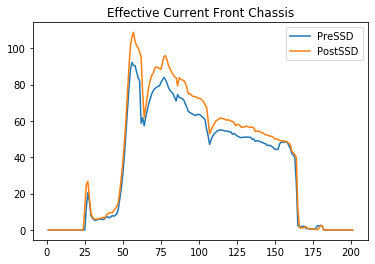

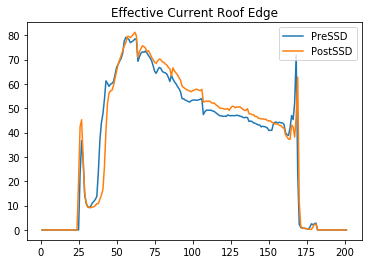

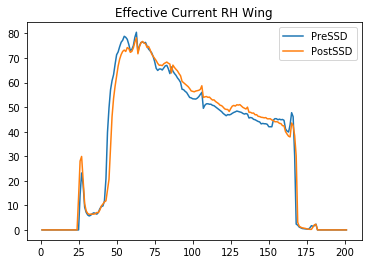

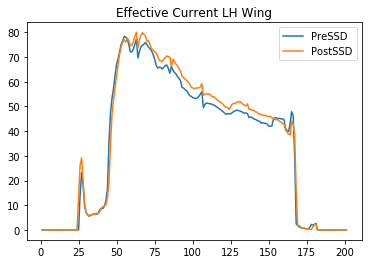

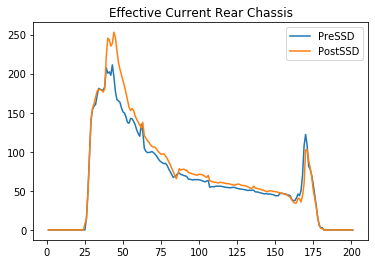

In [8]:
#Create training Data
dfx_train = DFtrain.iloc[:,0:3]
dfy_train = DFtrain.iloc[:,3:8]

xtrain=dfx_train.values #convert to np array
xtrain.reshape(201,3) # (n_samples,n_features) features: Body Position,Applied Amps,Coulombs

ytrain = dfy_train.values #convert to np array
ytrain.reshape(201,5) # (n_samples,n_targets) Targets(Applied Amps): Front, Roof, RH Wing, LH Wing, Rear 

#Create Validation Data
dfx_valid = DFvalid.iloc[:,0:3]
dfy_valid = DFvalid.iloc[:,3:8]

xtest=dfx_valid.values #convert to np array
xtest.reshape(201,3)  # (n_samples,n_features) features: Body Pos,Applied Amps,Coulombs

ytest = dfy_valid.values #convert to np array
ytest = ytest.reshape(201,5) # (n_samples,n_targets) Targets(Applied Amps): Front, Roof, RH Wing, LH Wing, Rear

plt.plot(DFtrain['BPOS'],ytrain[:,0],label='PreSSD')
plt.plot(DFtrain['BPOS'],ytest[:,0],label='PostSSD')
plt.legend(loc='upper right')
plt.title('Effective Current Front Chassis')
plt.show()

plt.plot(DFtrain['BPOS'],ytrain[:,1],label='PreSSD')
plt.plot(DFtrain['BPOS'],ytest[:,1],label='PostSSD')
plt.legend(loc='upper right')
plt.title('Effective Current Roof Edge')
plt.show()

plt.plot(DFtrain['BPOS'],ytrain[:,2],label='PreSSD')
plt.plot(DFtrain['BPOS'],ytest[:,2],label='PostSSD')
plt.legend(loc='upper right')
plt.title('Effective Current RH Wing')
plt.show()

plt.plot(DFtrain['BPOS'],ytrain[:,3],label='PreSSD')
plt.plot(DFtrain['BPOS'],ytest[:,3],label='PostSSD')
plt.legend(loc='upper right')
plt.title('Effective Current LH Wing')
plt.show()

plt.plot(DFtrain['BPOS'],ytrain[:,4],label='PreSSD')
plt.plot(DFtrain['BPOS'],ytest[:,4],label='PostSSD')
plt.legend(loc='upper right')
plt.title('Effective Current Rear Chassis')
plt.show()


## Fit Linear Regression Models

In [9]:
lr_model = linear_model.LinearRegression()
quad_model = linear_model.LinearRegression()
cubic_model = linear_model.LinearRegression()

quad = PolynomialFeatures(degree=2,interaction_only=False) #Create features for a quadratic equation
cubic = PolynomialFeatures(degree=3,interaction_only=False) #Create features for a cubic equation

xtrain_quad = quad.fit_transform(xtrain) #transform the training data for a quatratic equation
xtest_quad = quad.fit_transform(xtest) #transform the validation data for a quatratic equation

xtrain_cubic = cubic.fit_transform(xtrain) #transform the training data for a cubic equation
xtest_cubic = cubic.fit_transform(xtest)  #transform the validation data for a cubic equation

lr_model.fit(xtrain,ytrain) #fit linear regression model for a linear equation 
quad_model.fit(xtrain_quad,ytrain) #fit linear regression model for a quadratic equation
cubic_model.fit(xtrain_cubic,ytrain) #fit linear regression model for a cubic equation

ytrain_pred_lr = lr_model.predict(xtrain) #Predict target values for training dataset using linear equation model
ytrain_pred_quad = quad_model.predict(xtrain_quad) #Predict target values for training dataset using quadratic equation model
ytrain_pred_cubic = cubic_model.predict(xtrain_cubic) #Predict target values for training dataset using cubic equation model

#print(quad_model.coef_)
#print(cubic_model.coef_)

print("Models for effective currents at panels (features: Applied Amps, Coulombs) / Targets(Front,Roof,RH Wing,LH Wing, Rear)")
print("Regression Score Linear Equation:",r2_score(ytrain,ytrain_pred_lr)) #average regression score for linear eq. model
print("Regression Score Quadratic Equation:",r2_score(ytrain,ytrain_pred_quad)) #average regression score for quadratic eq. model
print("Regression Score Cubic Equation:",r2_score(ytrain,ytrain_pred_cubic)) #average regression score for cubic eq. model

Models for effective currents at panels (features: Applied Amps, Coulombs) / Targets(Front,Roof,RH Wing,LH Wing, Rear)
Regression Score Linear Equation: 0.8584624753064262
Regression Score Quadratic Equation: 0.9546077964768722
Regression Score Cubic Equation: 0.9788446927827614


## Predict Targets for Validation Data using Quadratic and Cubic Model

In [10]:
ytest_pred_lr = lr_model.predict(xtest) #predict target values for validation dataset using linear equation model
ytest_pred_quad = quad_model.predict(xtest_quad) #predict target values for validation dataset using quadratic equation model
ytest_pred_cubic = cubic_model.predict(xtest_cubic) #predict target values for validation dataset using cubic equation model

scores_lr = r2_score(ytest,ytest_pred_lr,multioutput='raw_values') #calculate regression score for Validation Data
print(":: Regression Scores for Validation Data Using Quadratics Eq. Model::")
print("Score for Front Chassis Amps:",scores_lr[0])
print("Score for Roof Edge Amps:",scores_lr[1])
print("Score for RH Wing Mount Amps:",scores_lr[2])
print("Score for LH Wing Mount Amps:",scores_lr[3])
print("Score for Rear Chassis Amps:",scores_lr[4])
print("\n")

scores_quad = r2_score(ytest,ytest_pred_quad,multioutput='raw_values') #calculate regression score for Validation Data
print(":: Regression Scores for Validation Data Using Quadratics Eq. Model::")
print("Score for Front Chassis Amps:",scores_quad[0])
print("Score for Roof Edge Amps:",scores_quad[1])
print("Score for RH Wing Mount Amps:",scores_quad[2])
print("Score for LH Wing Mount Amps:",scores_quad[3])
print("Score for Rear Chassis Amps:",scores_quad[4])
print("\n")

scores_cubic = r2_score(ytest,ytest_pred_cubic,multioutput='raw_values') #calculate regression score for Validation Data
print(":: Regression Scores for Validation Data Using Cubic Eq. Model::")
print("Score for Front Chassis Amps:",scores_cubic[0])
print("Score for Roof Edge Amps:",scores_cubic[1])
print("Score for RH Wing Mount Amps:",scores_cubic[2])
print("Score for LH Wing Mount Amps:",scores_cubic[3])
print("Score for Rear Chassis Amps:",scores_cubic[4])


:: Regression Scores for Validation Data Using Quadratics Eq. Model::
Score for Front Chassis Amps: 0.8172533713649497
Score for Roof Edge Amps: 0.9106372277497571
Score for RH Wing Mount Amps: 0.8719967852280349
Score for LH Wing Mount Amps: 0.8802182756253987
Score for Rear Chassis Amps: 0.6501204975185584


:: Regression Scores for Validation Data Using Quadratics Eq. Model::
Score for Front Chassis Amps: -1.7452215802026032
Score for Roof Edge Amps: 0.2692845299670873
Score for RH Wing Mount Amps: 0.6332494926251513
Score for LH Wing Mount Amps: 0.9137941525134429
Score for Rear Chassis Amps: 0.751958263897437


:: Regression Scores for Validation Data Using Cubic Eq. Model::
Score for Front Chassis Amps: -2.478755931564488
Score for Roof Edge Amps: -1.7662793074733432
Score for RH Wing Mount Amps: -0.2887831081026315
Score for LH Wing Mount Amps: 0.40275640647043875
Score for Rear Chassis Amps: -0.5317090940530333


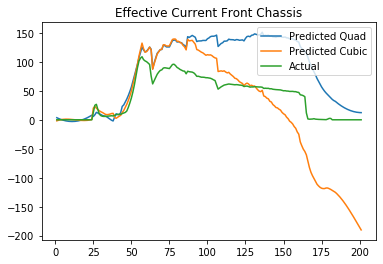

Mean Error on Front Chassis using Quadratic Model: +/- 57.13797089147264 Amps
Mean Error on Front Chassis using Cubic Model: +/- 64.32030443068057 Amps


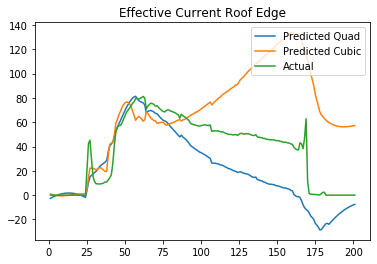

Mean Error on Roof using Quadratic Model: +/- 23.565281654524004 Amps
Mean Error on Roof using Cubic Model: +/- 45.850755695667935 Amps


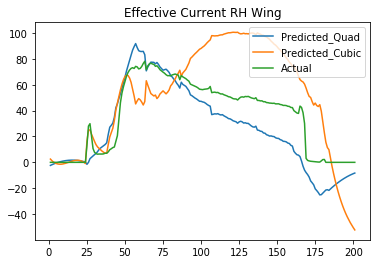

Mean Error on RH Wing using Quadratic Model: +/- 16.79857688747119 Amps
Mean Error on RH Wing using Cubic Model: +/- 31.49031808038892 Amps


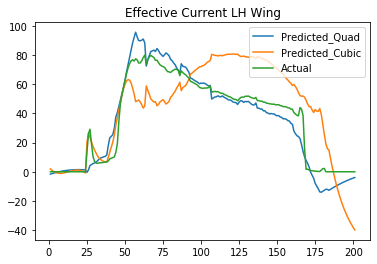

Mean Error on RH Wing using Quadratic Model: +/- 8.39006646718507 Amps
Mean Error on RH Wing using Cubic Model: +/- 22.083748291631526 Amps


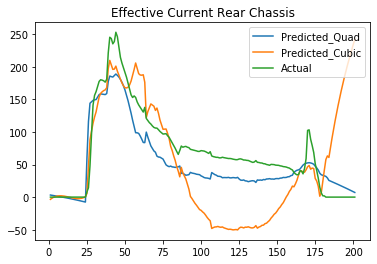

Mean Error on Rear using Quadratic Model: +/- 31.054149098096936 Amps
Mean Error on Rear using Cubic Model: +/- 77.16944876896665 Amps


In [11]:
#plt.plot(DFtrain['BPOS'],ytest_pred_lr[:,0],label='Predicted Linear')
plt.plot(DFtrain['BPOS'],ytest_pred_quad[:,0],label='Predicted Quad')
plt.plot(DFtrain['BPOS'],ytest_pred_cubic[:,0],label='Predicted Cubic')
plt.plot(DFtrain['BPOS'],ytest[:,0],label='Actual')
plt.legend(loc='upper right')
plt.title('Effective Current Front Chassis')
plt.show()

#MSE_front_lr = metrics.mean_squared_error(ytest[:,0],ytest_pred_lr[:,0])
MSE_front_quad = metrics.mean_squared_error(ytest[:,0],ytest_pred_quad[:,0])
MSE_front_cubic = metrics.mean_squared_error(ytest[:,0],ytest_pred_cubic[:,0])
#print('Mean Error on Front Chassis using linear Model: +/-', math.sqrt(MSE_front_lr),'Amps')
print('Mean Error on Front Chassis using Quadratic Model: +/-', math.sqrt(MSE_front_quad),'Amps')
print('Mean Error on Front Chassis using Cubic Model: +/-', math.sqrt(MSE_front_cubic),'Amps')

#plt.plot(DFtrain['BPOS'],ytest_pred_quad[:,1],label='Predicted Linear')
plt.plot(DFtrain['BPOS'],ytest_pred_quad[:,1],label='Predicted Quad')
plt.plot(DFtrain['BPOS'],ytest_pred_cubic[:,1],label='Predicted Cubic')
plt.plot(DFtrain['BPOS'],ytest[:,1],label='Actual')
plt.legend(loc='upper right')
plt.title('Effective Current Roof Edge')
plt.show()

#MSE_Roof_lr = metrics.mean_squared_error(ytest[:,1],ytest_pred_lr[:,1])
MSE_Roof_quad = metrics.mean_squared_error(ytest[:,1],ytest_pred_quad[:,1])
MSE_Roof_cubic = metrics.mean_squared_error(ytest[:,1],ytest_pred_cubic[:,1])
#print('Mean Error on Roof using Linear Model: +/-', math.sqrt(MSE_Roof_lr),'Amps')
print('Mean Error on Roof using Quadratic Model: +/-', math.sqrt(MSE_Roof_quad),'Amps')
print('Mean Error on Roof using Cubic Model: +/-', math.sqrt(MSE_Roof_cubic),'Amps')

plt.plot(DFtrain['BPOS'],ytest_pred_quad[:,2],label='Predicted_Quad')
plt.plot(DFtrain['BPOS'],ytest_pred_cubic[:,2],label='Predicted_Cubic')
plt.plot(DFtrain['BPOS'],ytest[:,2],label='Actual')
plt.legend(loc='upper right')
plt.title('Effective Current RH Wing')
plt.show()

MSE_RHWing_quad = metrics.mean_squared_error(ytest[:,2],ytest_pred_quad[:,2])
MSE_RHWing_cubic = metrics.mean_squared_error(ytest[:,2],ytest_pred_cubic[:,2])
print('Mean Error on RH Wing using Quadratic Model: +/-', math.sqrt(MSE_RHWing_quad),'Amps')
print('Mean Error on RH Wing using Cubic Model: +/-', math.sqrt(MSE_RHWing_cubic),'Amps')

plt.plot(DFtrain['BPOS'],ytest_pred_quad[:,3],label='Predicted_Quad')
plt.plot(DFtrain['BPOS'],ytest_pred_cubic[:,3],label='Predicted_Cubic')
plt.plot(DFtrain['BPOS'],ytest[:,3],label='Actual')
plt.legend(loc='upper right')
plt.title('Effective Current LH Wing')
plt.show()

MSE_LHWing_quad = metrics.mean_squared_error(ytest[:,3],ytest_pred_quad[:,3])
MSE_LHWing_cubic = metrics.mean_squared_error(ytest[:,3],ytest_pred_cubic[:,3])
print('Mean Error on RH Wing using Quadratic Model: +/-', math.sqrt(MSE_LHWing_quad),'Amps')
print('Mean Error on RH Wing using Cubic Model: +/-', math.sqrt(MSE_LHWing_cubic),'Amps')

plt.plot(DFtrain['BPOS'],ytest_pred_quad[:,4],label='Predicted_Quad')
plt.plot(DFtrain['BPOS'],ytest_pred_cubic[:,4],label='Predicted_Cubic')
plt.plot(DFtrain['BPOS'],ytest[:,4],label='Actual')
plt.legend(loc='upper right')
plt.title('Effective Current Rear Chassis')
plt.show()

MSE_Rear_quad = metrics.mean_squared_error(ytest[:,4],ytest_pred_quad[:,4])
MSE_Rear_cubic = metrics.mean_squared_error(ytest[:,4],ytest_pred_cubic[:,4])
print('Mean Error on Rear using Quadratic Model: +/-', math.sqrt(MSE_Rear_quad),'Amps')
print('Mean Error on Rear using Cubic Model: +/-', math.sqrt(MSE_Rear_cubic),'Amps')

## Compare Coulombs on Panels

             FRNT          ROOF        RH_WNG        LH_WNG          REAR
196  16238.487285  15164.829363  14457.363939  14692.893369  28170.426044
197  16238.487285  15164.829363  14457.363939  14692.893369  28170.426044
198  16238.487285  15164.829363  14457.363939  14692.893369  28170.426044
199  16238.487285  15164.829363  14457.363939  14692.893369  28170.426044
200  16238.487285  15164.829363  14457.363939  14692.893369  28170.426044
              FRNT         ROOF        RH_WNG       LH_WNG          REAR
BPOS                                                                    
197   34299.217121  9873.531499  11721.203702  14749.29674  21039.418208
198   34325.328418  9873.531499  11721.203702  14749.29674  21060.629675
199   34350.698412  9873.531499  11721.203702  14749.29674  21079.555581
200   34375.586238  9873.531499  11721.203702  14749.29674  21096.177665
201   34400.251032  9873.531499  11721.203702  14749.29674  21110.477668
FRNT     -18161.763747
ROOF       5291.297864

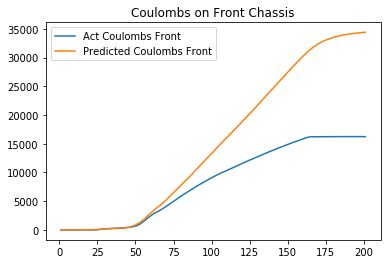

Front Chassis Error (Actual - Predicted): -18161.76374679548 Amps.Sec
Front Chassis Percentage Error: -1.1184393859078996 %


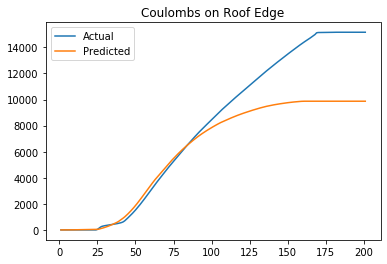

Roof Edge Error (Actual - Predicted): 5291.29786424126 Amps.Sec
Roof Edge Percentage Error: 0.34891905062135903 %


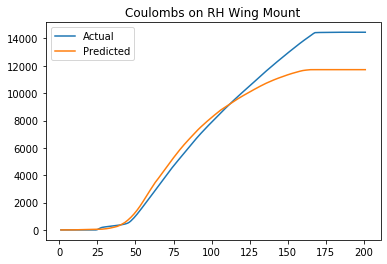

RH Wing Mount Error (Actual - Predicted): 2736.1602371035915 Amps.Sec
RH Wing Mount Percentage Error: 0.18925720128791873 %


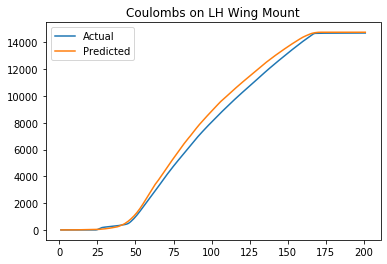

LH Wing Mount Error (Actual - Predicted): -56.40337087451371 Amps.sec
LH Wing Mount Percentage Error: -0.00383881986067231 %


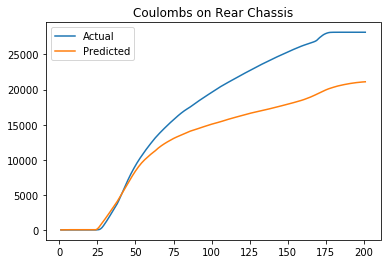

Rear Chassis Error (Actual - Predicted): 7059.948375789911 Amps.Sec
Rear Chassis Percentage Error: 0.2506156053419727 %


In [12]:
#convert predict values to a dataframe

columns = ['FRNT','ROOF','RH_WNG','LH_WNG','REAR']
index = DFvalid['BPOS']
df_predict = pd.DataFrame(data=ytest_pred_quad,
                         columns=columns,
                         index = index)

df_predict[df_predict < 0] = 0

df_predict_coulmbs = df_predict.mul(2).cumsum()
df_valid_coulmbs = DFvalid.iloc[:,3:8].mul(2).cumsum()

print(df_valid_coulmbs.tail())
print(df_predict_coulmbs.tail())

errors = df_valid_coulmbs.iloc[200,:]-df_predict_coulmbs.iloc[200,:]
print(errors)

pct_errors = errors/df_valid_coulmbs.iloc[200,:]
print(pct_errors)

plt.plot(DFvalid['BPOS'],df_valid_coulmbs['FRNT'],label='Act Coulombs Front')
plt.plot(DFvalid['BPOS'],df_predict_coulmbs['FRNT'],label='Predicted Coulombs Front')
plt.title('Coulombs on Front Chassis')
plt.legend()
plt.show()
print('Front Chassis Error (Actual - Predicted):',errors['FRNT'],'Amps.Sec')
print('Front Chassis Percentage Error:',pct_errors['FRNT'],'%')

plt.plot(DFvalid['BPOS'],df_valid_coulmbs['ROOF'],label='Actual')
plt.plot(DFvalid['BPOS'],df_predict_coulmbs['ROOF'],label='Predicted')
plt.title('Coulombs on Roof Edge')
plt.legend()
plt.show()
print('Roof Edge Error (Actual - Predicted):',errors['ROOF'],'Amps.Sec')
print('Roof Edge Percentage Error:',pct_errors['ROOF'],'%')

plt.plot(DFvalid['BPOS'],df_valid_coulmbs['RH_WNG'],label='Actual')
plt.plot(DFvalid['BPOS'],df_predict_coulmbs['RH_WNG'],label='Predicted')
plt.title('Coulombs on RH Wing Mount')
plt.legend()
plt.show()
print('RH Wing Mount Error (Actual - Predicted):',errors['RH_WNG'],'Amps.Sec')
print('RH Wing Mount Percentage Error:',pct_errors['RH_WNG'],'%')

plt.plot(DFvalid['BPOS'],df_valid_coulmbs['LH_WNG'],label='Actual')
plt.plot(DFvalid['BPOS'],df_predict_coulmbs['LH_WNG'],label='Predicted')
plt.title('Coulombs on LH Wing Mount')
plt.legend()
plt.show()
print('LH Wing Mount Error (Actual - Predicted):',errors['LH_WNG'],'Amps.sec')
print('LH Wing Mount Percentage Error:',pct_errors['LH_WNG'],'%')

plt.plot(DFvalid['BPOS'],df_valid_coulmbs['REAR'],label='Actual')
plt.plot(DFvalid['BPOS'],df_predict_coulmbs['REAR'],label='Predicted')
plt.title('Coulombs on Rear Chassis')
plt.legend()
plt.show()
print('Rear Chassis Error (Actual - Predicted):',errors['REAR'],'Amps.Sec')
print('Rear Chassis Percentage Error:',pct_errors['REAR'],'%')